# IMPORTING LIBRARY

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# LOAD THE DATASET

In [2]:
# df= match played dataset across the season
df=pd.read_csv(r'D:\COMPLETE PROJECT\IPL TEAMS ANALYSIS\data.csv')
df1=pd.read_csv(r'D:\COMPLETE PROJECT\IPL TEAMS ANALYSIS\data1.csv')
# df1= bowl dataset across the season

In [3]:
df.head(2)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri


In [4]:
df1.head(2)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


# ATTRIBUTES OF EACH DATAFRAMES

In [5]:
df.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [13]:
df1.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

# CREATING A TABLE WHICH SHOWS THE OVERVIEW OF TEAM ACROSS THE SEASONS

In [6]:
Session_Wise=df.groupby(['winner'])['id'].count().reset_index().rename(columns={'winner':'Teams','id':'Win'})
Session_Wise.head()

,Teams,Win
0,Chennai Super Kings,106
1,Deccan Chargers,29
2,Delhi Capitals,19
3,Delhi Daredevils,67
4,Gujarat Lions,13


In [7]:
Session_Wise1=pd.DataFrame(df.team1.value_counts()+df.team2.value_counts()).reset_index().rename(columns={'index':'Teams',0:'Match Played'})
Session_Wise1.head()

,Teams,Match Played
0,Chennai Super Kings,178
1,Deccan Chargers,75
2,Delhi Capitals,33
3,Delhi Daredevils,161
4,Gujarat Lions,30


In [8]:
Session_Wise2=pd.DataFrame((df.team1.value_counts()+df.team2.value_counts())-df.winner.value_counts()).reset_index().rename(columns={'index':'Teams',0:'Lose'})
Session_Wise2.head()

,Teams,Lose
0,Chennai Super Kings,72
1,Deccan Chargers,46
2,Delhi Capitals,14
3,Delhi Daredevils,94
4,Gujarat Lions,17


In [9]:
Session_Wise5=pd.DataFrame(df.winner.value_counts()/(df.team1.value_counts()+df.team2.value_counts())*100).reset_index().rename(columns={0:'Winning(%)','index':'Teams'})
Session_Wise5.head()

,Teams,Winning(%)
0,Chennai Super Kings,59.550562
1,Deccan Chargers,38.666667
2,Delhi Capitals,57.575758
3,Delhi Daredevils,41.614907
4,Gujarat Lions,43.333333


In [10]:
df5 = Session_Wise.merge(Session_Wise1, on='Teams', how='left').merge(Session_Wise2, on='Teams', how='left').merge(Session_Wise5, on='Teams', how='left').rename(columns={'Lose_y':'Lose'})
df5.head()

,Teams,Win,Match Played,Lose,Winning(%)
0,Chennai Super Kings,106,178,72,59.550562
1,Deccan Chargers,29,75,46,38.666667
2,Delhi Capitals,19,33,14,57.575758
3,Delhi Daredevils,67,161,94,41.614907
4,Gujarat Lions,13,30,17,43.333333


In [12]:
final=df5[['Teams','Match Played','Win','Lose','Winning(%)']]
final.head()

,Teams,Match Played,Win,Lose,Winning(%)
0,Chennai Super Kings,178,106,72,59.550562
1,Deccan Chargers,75,29,46,38.666667
2,Delhi Capitals,33,19,14,57.575758
3,Delhi Daredevils,161,67,94,41.614907
4,Gujarat Lions,30,13,17,43.333333


# DIVIDING THE COLUMNS "DATE" INTO SUBCOLUMNS FOR BETTER FILTERATION

In [15]:
df[['year','Month','day']] = df['date'].str.split("-",expand=True)

In [16]:
df.drop('day',axis=1,inplace=True)

In [17]:
df=df.rename(columns={'year':'Session'})

In [18]:
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Session,Month
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008,04
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008,04
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008,04
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008,04
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008,04


# FINDING THE TOTAL NUMBER OF MATCHES PLAYED IN EACH SEASON

In [19]:
Session_Data=df.groupby(['Session'])['id'].count().reset_index().rename(columns={'id':'matches'})
Session_Data.head()

,Session,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74


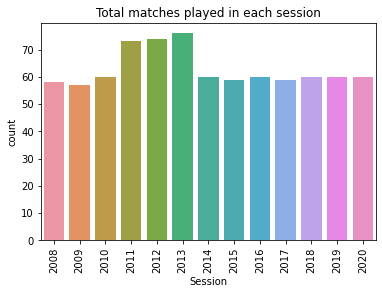

In [20]:
sns.countplot(df.Session)
plt.xticks(rotation=90,fontsize=10)
plt.title('Total matches played in each session')
plt.show()

# MERGING THE TWO DATAFRAME ON THE BASIS OF ID

In [22]:
season_data=df[['id','Session']].merge(df1,left_on = 'id',right_on='id', how='left').drop('id',axis=1)
season_data.head()

,Session,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


# FINDING THE TOTAL RUNS ACROSS THE SEASON

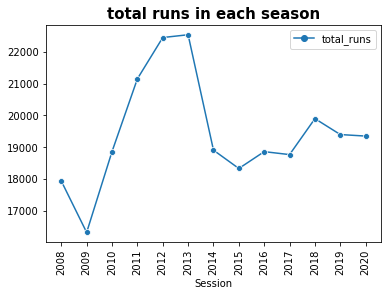

In [24]:
season=season_data.groupby(['Session'])['total_runs'].sum().reset_index()
p=season.set_index('Session')
sns.lineplot(data=p,markers='o')
plt.xticks(rotation=90,fontsize=10)
plt.title("total runs in each season",fontsize=15,fontweight='bold')
plt.show()

# FINDING THE TOTAL TOSS WON BY EACH TEAM

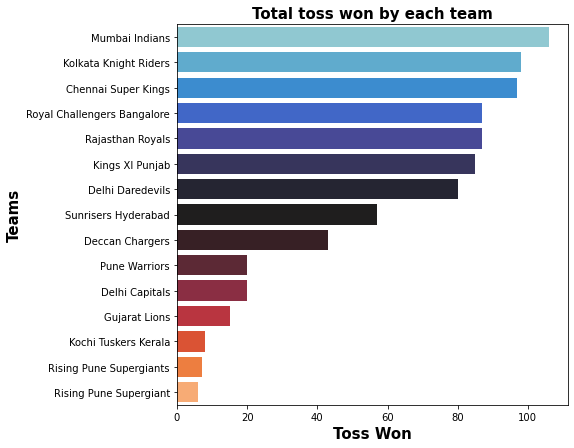

In [25]:
plt.figure(figsize=(7,7))
toss=df['toss_winner'].value_counts()
sns.barplot(y=toss.index,x=toss,orient='h',palette='icefire',saturation=1)
plt.xlabel('Toss Won',fontsize=15,fontweight='bold')
plt.ylabel('Teams',fontsize=15,fontweight='bold')
plt.title("Total toss won by each team",fontsize=15,fontweight='bold')
plt.show()

# TOSS DECISION BY TEAMS

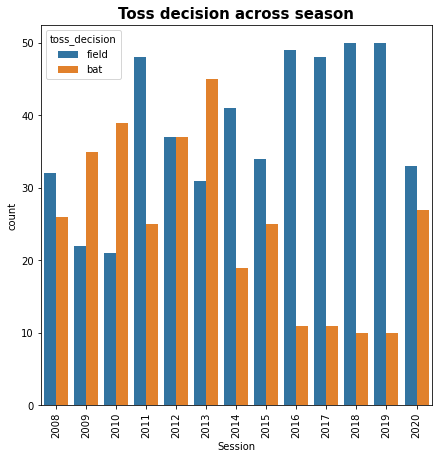

In [26]:
plt.figure(figsize=(7,7))
sns.countplot(x='Session',hue='toss_decision',data=df)
plt.xticks(rotation=90,fontsize=10)
plt.title('Toss decision across season',fontsize=15,fontweight='bold')
plt.show()

# WINNER DISTRIBUTION IN IPL

In [27]:
df.result.value_counts()

wickets    435
runs       364
tie         13
Name: result, dtype: int64

# BEST STADIUM FOR WINNING BY RUNS

In [28]:
df.venue[df.result=='runs'].value_counts().head()

Wankhede Stadium                             35
Feroz Shah Kotla                             35
MA Chidambaram Stadium, Chepauk              34
Eden Gardens                                 32
Rajiv Gandhi International Stadium, Uppal    28
Name: venue, dtype: int64

# BEST STADIUM FOR WINNING BY WICKETS

In [30]:
df.venue[df.result=='wickets'].value_counts().head()

Eden Gardens                                 45
Feroz Shah Kotla                             37
Wankhede Stadium                             37
M Chinnaswamy Stadium                        36
Rajiv Gandhi International Stadium, Uppal    35
Name: venue, dtype: int64

# GROUND WHERE A TEAM WIN A TOSS AND ALSO WIN THE MATCH

In [31]:
df.venue[df.toss_winner=='Delhi Capitals'][df.winner=='Delhi Capitals'].value_counts()

Feroz Shah Kotla                                       3
Sheikh Zayed Stadium                                   2
Eden Gardens                                           1
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium    1
Dubai International Cricket Stadium                    1
Sawai Mansingh Stadium                                 1
M.Chinnaswamy Stadium                                  1
Name: venue, dtype: int64

# TEAMS WHO PLAYED 1ST AND THEY WON

In [32]:
df.winner[df.result!='wickets'].value_counts()

Mumbai Indians                 64
Chennai Super Kings            53
Kings XI Punjab                43
Kolkata Knight Riders          42
Royal Challengers Bangalore    40
Sunrisers Hyderabad            35
Rajasthan Royals               30
Delhi Daredevils               25
Deccan Chargers                18
Delhi Capitals                 11
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            2
Rising Pune Supergiants         2
Gujarat Lions                   1
Name: winner, dtype: int64

# TEAMS WHO PLAYED 2ND AND THEY WON

In [33]:
df.winner[df.result!='runs'].value_counts()

Kolkata Knight Riders          58
Mumbai Indians                 58
Chennai Super Kings            53
Royal Challengers Bangalore    53
Rajasthan Royals               53
Kings XI Punjab                48
Delhi Daredevils               42
Sunrisers Hyderabad            32
Gujarat Lions                  12
Deccan Chargers                11
Delhi Capitals                 10
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

# TOSS DECISION VS WINNER

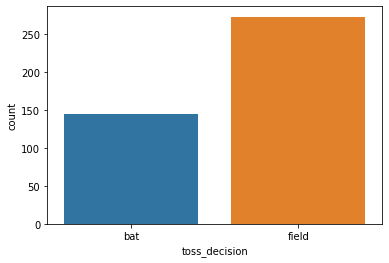

In [34]:
sns.countplot(df.toss_decision[df.toss_winner==df.winner])
plt.show()

# ANALYSIS ON THE BASIS OF BATSMAN

In [35]:
player=(df1['batsman']=='SK Raina')
df_raina=df1[player]
df_raina.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
246,335983,1,10,3,SK Raina,MEK Hussey,PP Chawla,2,0,2,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
247,335983,1,10,4,SK Raina,MEK Hussey,PP Chawla,0,0,0,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
248,335983,1,10,5,SK Raina,MEK Hussey,PP Chawla,6,0,6,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
249,335983,1,10,6,SK Raina,MEK Hussey,PP Chawla,4,0,4,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
253,335983,1,11,4,SK Raina,MEK Hussey,K Goel,6,0,6,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab


# FOR RETURN THE DISTRIBUTION OF PLAYERS IN FORM OF WICKETS

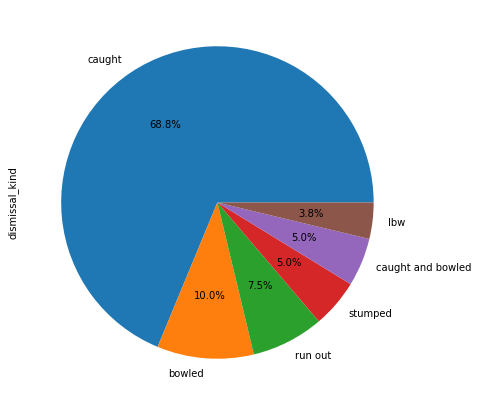

In [36]:
def Wicket(Player_name):
    plt.figure(figsize=(7,8))
    player=(df1['batsman']==Player_name)
    Temp=df1[player]
    Temp['dismissal_kind'].value_counts().plot.pie(autopct="%1.1f%%")
Wicket('SK Raina')

# FOR RETURN THE DISTRIBUTION OF PLAYERS IN FORM OF RUNS

In [37]:
def runsdistribution(df1,Player_name):
    player=(df1['batsman']==Player_name)
    Temp=df1[player]
    print("run scored from 1's",len(Temp[Temp['batsman_runs']==1])*1)
    print("run scored from 2's",len(Temp[Temp['batsman_runs']==2])*2)
    print("run scored from 3's",len(Temp[Temp['batsman_runs']==3])*3)
    print("run scored from 4's",len(Temp[Temp['batsman_runs']==4])*4)
    print("run scored from 6's",len(Temp[Temp['batsman_runs']==6])*6)
runsdistribution(df1,'SK Raina')

run scored from 1's 1666
run scored from 2's 528
run scored from 3's 33
run scored from 4's 1972
run scored from 6's 1164


# TOP 10 PLAYERS IN IPL SESSION ON THE BASIS OF RUNS

In [39]:
runs=df1.groupby(['batsman'])['batsman_runs'].sum().reset_index()
runs.columns=['batsman','runs']
y=runs.sort_values(by='runs',ascending=False)
y.head(10)

,batsman,runs
505,V Kohli,5878
438,SK Raina,5368
116,DA Warner,5254
379,RG Sharma,5230
407,S Dhawan,5197
24,AB de Villiers,4849
96,CH Gayle,4772
301,MS Dhoni,4632
398,RV Uthappa,4607
154,G Gambhir,4217


# TOP 10 PLAYERS IN IPL SESSION ON THE BASIS OF MAN OF THE MATCH

In [40]:
runs=df.player_of_match.value_counts().reset_index()
runs.columns=['batsman','runs']
y=runs.sort_values(by='runs',ascending=False)
y.head(10)

,batsman,runs
0,AB de Villiers,23
1,CH Gayle,22
2,RG Sharma,18
3,DA Warner,17
4,MS Dhoni,17
5,SR Watson,16
6,YK Pathan,16
7,SK Raina,14
8,V Kohli,13
9,G Gambhir,13


# FILTER ON THE BASIS OF YEARS

In [57]:
def yearwiseanalysis(df,Session):
    if Session=='overall':
        df['Session']=pd.DatetimeIndex(df['date']).year
        Session_Wise=df.groupby(['winner'])['id'].count().reset_index().rename(columns={'winner':'Teams','id':'Win'})
        Session_Wise1=pd.DataFrame(df.team1.value_counts()+df.team2.value_counts()).reset_index().rename(columns={'index':'Teams',0:'Match Played'})
        Session_Wise2=pd.DataFrame((df.team1.value_counts()+df.team2.value_counts())-df.winner.value_counts()).reset_index().rename(columns={'index':'Teams',0:'Lose'})
        Session_Wise5=pd.DataFrame(df.winner.value_counts()/(df.team1.value_counts()+df.team2.value_counts())*100).reset_index().rename(columns={0:'Winning(%)','index':'Teams'})
        df5 = Session_Wise.merge(Session_Wise1, on='Teams', how='left').merge(Session_Wise2, on='Teams', how='left').merge(Session_Wise5, on='Teams', how='left').rename(columns={'Lose_y':'Lose'})
        final=df5[['Teams','Match Played','Win','Lose','Winning(%)']]
        return final
    else:
        df['Session']=pd.DatetimeIndex(df['date']).year
        df=df[df.Session==Session]
        Session_Wise=df.groupby(['winner'])['id'].count().reset_index().rename(columns={'winner':'Teams','id':'Win'})
        Session_Wise1=pd.DataFrame(df.team1.value_counts()+df.team2.value_counts()).reset_index().rename(columns={'index':'Teams',0:'Match Played'})
        Session_Wise2=pd.DataFrame((df.team1.value_counts()+df.team2.value_counts())-df.winner.value_counts()).reset_index().rename(columns={'index':'Teams',0:'Lose'})
        Session_Wise5=pd.DataFrame(df.winner.value_counts()/(df.team1.value_counts()+df.team2.value_counts())*100).reset_index().rename(columns={0:'Winning(%)','index':'Teams'})
        df5 = Session_Wise.merge(Session_Wise1, on='Teams', how='left').merge(Session_Wise2, on='Teams', how='left').merge(Session_Wise5, on='Teams', how='left').rename(columns={'Lose_y':'Lose'})
        final=df5[['Teams','Match Played','Win','Lose','Winning(%)']]
        return final
yearwiseanalysis(df,Session=2010)

,Teams,Match Played,Win,Lose,Winning(%)
0,Chennai Super Kings,16,9,7,56.250000
1,Deccan Chargers,16,8,8,50.000000
2,Delhi Daredevils,14,7,7,50.000000
3,Kings XI Punjab,14,4,10,28.571429
4,Kolkata Knight Riders,14,7,7,50.000000
5,Mumbai Indians,16,11,5,68.750000
6,Rajasthan Royals,14,6,8,42.857143
7,Royal Challengers Bangalore,16,8,8,50.000000
